**<font color = black size=6>实验三:逻辑回归</font>**

**<font color = blue size=4>第一部分:函数介绍</font>**

<span style="color:purple">由于机器学习所使用的数据集并不一定能够直接进行使用，如经常可能出现缺失值或者异常值（如异常0或者异常大的数据），又或者是数据类型不适合直接应用于模型训练等，所以数据预处理同样是机器学习过程中十分重要的一个部分。  
    本次实验的数据预处理需要用的操作包括判断数据是否有缺失值以及异常值、缺失值替换操作、并将部分特征值类型转换为适合模型训练的类型。在进行逻辑回归实验之前，首先介绍下上述操作所用到的python语法。</span>

<span style="color:purple">1) 判断一列中是否有缺失值</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#通过pandas将csv文件转换为dataframe格式后进行操作
train1_frame = pd.read_csv('introduction.csv')
#判断每一列是否有空值并返回每列空值的数量
print(train1_frame.isnull().sum())
print(train1_frame)

height    2
weight    2
sex       0
dtype: int64
   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3     NaN    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     0.0  Female
9     NaN    50.0  Female


<span style="color:purple">2) 对每一列的缺失值和异常值进行替换操作</span>

In [3]:
#将0替换为空值，之后将空值替换为修正的值(例如：平均值、中数、众数等)
#利用pandas中的replace函数将某一列的指定值替换为另一个值
train1_frame[['height','weight']]=\
train1_frame[['height','weight']].replace(0,np.NaN)
print(train1_frame)

   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3     NaN    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     NaN  Female
9     NaN    50.0  Female


In [4]:
#先对height列进行分离，之后将temp按照性别进行分类，之后使用mean函数分别计算male和female非空数据的height的平均值
temp=train1_frame[train1_frame['height'].notnull()]
print(temp)
temp=temp[['height','sex']].groupby(['sex'])[['height']].mean().reset_index()
print(temp)
#使用dataframe的loc函数将指定条件的height列和sex列筛选出来进行值替换操作
train1_frame.loc[(train1_frame['sex']=='Male')&(train1_frame['height'].isnull()),'height']=temp['height'][1]
train1_frame.loc[(train1_frame['sex']=='Female')&(train1_frame['height'].isnull()),'height']=temp['height'][0]
print(train1_frame)

   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     NaN  Female
      sex  height
0  Female   165.0
1    Male   166.5
   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3   166.5    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     NaN  Female
9   165.0    50.0  Female


In [5]:
#再对weight列进行分离，之后同样将temp按照性别进行分类，之后使用median函数分别计算male和female非空数据的height的平均值
temp=train1_frame[train1_frame['weight'].notnull()]
temp=temp[['weight','sex']].groupby(['sex'])[['weight']].median().reset_index()

#使用dataframe的loc函数将指定条件的height列和sex列筛选出来进行值替换操作
train1_frame.loc[(train1_frame['sex']=='Male')&(train1_frame['weight'].isnull()),'weight']=temp['weight'][0]
train1_frame.loc[(train1_frame['sex']=='Female')&(train1_frame['weight'].isnull()),'weight']=temp['weight'][1]
print(train1_frame)

   height  weight     sex
0   170.0    54.0    Male
1   180.0    50.0    Male
2   164.0    48.0  Female
3   166.5    66.0    Male
4   176.0    56.5  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0    56.5  Female
9   165.0    50.0  Female


<span style="color:purple">3) 将结果值从字符串变成容易操作的整数类型</span>

In [6]:
print(train1_frame)
train1_frame['sex'] = np.where(train1_frame['sex'] == "Male", 0, 1)
print(train1_frame)

   height  weight     sex
0   170.0    54.0    Male
1   180.0    50.0    Male
2   164.0    48.0  Female
3   166.5    66.0    Male
4   176.0    56.5  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0    56.5  Female
9   165.0    50.0  Female
   height  weight  sex
0   170.0    54.0    0
1   180.0    50.0    0
2   164.0    48.0    1
3   166.5    66.0    0
4   176.0    56.5    1
5   162.0    59.0    0
6   154.0    46.0    0
7   155.0    58.0    1
8   165.0    56.5    1
9   165.0    50.0    1


<span style="color:purple">4) 当坐标为两维时的绘图</span>

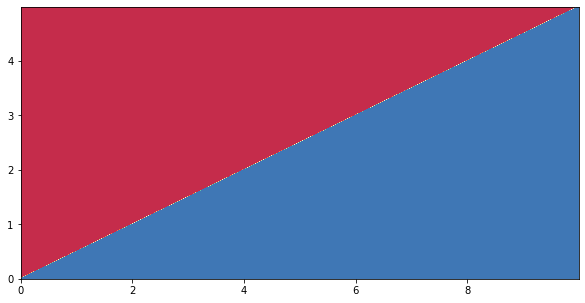

In [7]:
#确定图画边界和大小
plt.figure(figsize=(10,5))
x_min, x_max = 0,10
y_min, y_max = 0,5
#使用numpy中的meshgrid生成网格矩阵，方便进行之后的描点
boundary_x, boundary_y = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
grid = np.c_[boundary_x.ravel(), boundary_y.ravel()]
#加入偏置对应的一列
e=np.ones((len(grid),1))
grid=np.c_[e,grid]
#假定下列的模型参数
w=np.array([[0],[3],[-6]])
#计算出网格点中每个点对应的逻辑回归预测值
z=grid.dot(w)
for i in range(len(z)):
    z[i][0]=(1/(1+np.exp(-z[i])))
    if(z[i][0]<0.5):z[i][0]=0
    else:z[i][0]=1
#转换shape以作出决策边界
z=z.reshape(boundary_x.shape)
plt.contourf(boundary_x, boundary_y, z, cmap=plt.cm.Spectral, zorder=1)
plt.show()

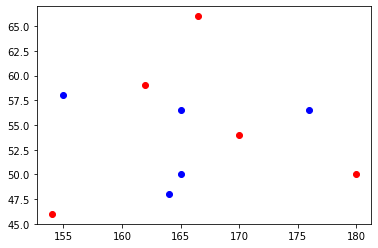

In [8]:
"""
可使用plt.scatter来绘制出测试集的每个样本点，并设置指定颜色来区分预测正确和错误的样本
plt.scatter(x,y,c="color")，x、y为坐标值，c为指定颜色
"""
class_1=train1_frame[train1_frame['sex']==1]
class_0=train1_frame[train1_frame['sex']==0]
plt.scatter(class_1['height'],class_1['weight'],c='blue')
plt.scatter(class_0['height'],class_0['weight'],c='red')
plt.show()

**<font color = blue size=4>第二部分:逻辑回归实验一</font>**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl

<span style="color:purple">Iris数据集是常用的分类实验数据集,也称鸢尾花卉数据集，是一类多重变量分析的数据集。我们实验选取数据集的部分内容，包含训练集中的80个数据样本和测试集的20个样本，分为2类，每个数据包含2个属性。可通过花萼长度(x1)，花萼宽度(x2)2个属性预测鸢尾花卉属于（Setosa，Versicolour）二个种类中的哪一类。</span>

<span style="color:purple">) 使用pandas库将训练数据集'flower_train.csv'与测试数据集'flower_test.csv'载入到Dataframe对象中，并判断训练集中每列数据是否有缺失值或者不合理的数值，如果有，请在不删除数据的前提下进行处理，而测试集为完好的数据集，不需要进行操作。由于花卉类型(type)为字符串类型，请将花卉类型转换为适合模型训练的类型</span>

In [10]:
#your code here------
trainframe_1=pd.read_csv("flower_train.csv")
testframe_1=pd.read_csv("flower_test.csv")
print(trainframe_1.isnull().sum())
trainframe_1[['x1','x2']]=trainframe_1[['x1','x2']].replace(0,np.NaN)
temp1=trainframe_1[trainframe_1['x1'].notnull()]
temp2=trainframe_1[trainframe_1['x2'].notnull()]
temp1=temp1['x1'].mean()
temp2=temp2['x2'].mean()#求出平均值以取代
#print(temp1,temp2) 
trainframe_1.loc[(trainframe_1['x1'].isnull()),'x1']=temp1
trainframe_1.loc[(trainframe_1['x2'].isnull()),'x2']=temp2
#print(trainframe_1.isnull().sum())
trainframe_1['type'] = np.where(trainframe_1['type'] == "Iris-setosa", 0, 1)
print(trainframe_1)#完成数据预处理
testx=np.array(testframe_1.iloc[ : , :-1])
#print(len(testx))
testx=np.c_[np.ones((len(testx),1)),testx]
print(testx)

x1      5
x2      6
type    0
dtype: int64
          x1        x2  type
0   5.478667  3.500000     0
1   4.900000  3.000000     0
2   4.700000  3.200000     0
3   4.600000  3.100000     0
4   5.000000  3.600000     0
..       ...       ...   ...
75  5.700000  3.095946     1
76  5.700000  2.900000     1
77  6.200000  2.900000     1
78  5.100000  3.095946     1
79  5.700000  2.800000     1

[80 rows x 3 columns]
[[1.  5.  3.5]
 [1.  4.5 2.3]
 [1.  4.4 3.2]
 [1.  5.  3.6]
 [1.  5.1 3.8]
 [1.  4.8 3. ]
 [1.  5.1 3.7]
 [1.  4.6 3.2]
 [1.  5.3 3.7]
 [1.  5.  3.3]
 [1.  7.  3.2]
 [1.  6.4 3.2]
 [1.  6.9 3.1]
 [1.  5.5 2.3]
 [1.  6.5 2.8]
 [1.  5.7 2.8]
 [1.  6.  3.5]
 [1.  4.9 2.4]
 [1.  6.6 2.9]
 [1.  5.2 2.7]]


<span style="color:purple">2)在之前的线性回归实验中，我们的模型为$\hat{y}=\omega^T x+b$，为方便实验，该实验中我们将偏置量b划入模型参数中，则对应的模型变为$\hat{y}=\omega^Tx$，请进行相应的转换  
tips:上一次实验中的矩阵求解析解的方法中将某一列全设置为1，即将偏置量b算入模型参数中，特征值中加入一列全1的特征量</span>

In [11]:
#your code here------

X=np.array(trainframe_1.iloc[ : , :-1])
y=np.array(trainframe_1.iloc[ : , -1])
X=np.c_[np.ones((80,1)),X]#注意这里两重括号
theta = np.zeros(X.shape[1])#np.shape[0]第一维度，即行， shape[1]为第二维度，即列
print(theta.shape)

(3,)


<span style="color:purple">3) 由于逻辑回归的原理是用逻辑函数把线性回归的结果(-∞,∞)映射到(0,1)所以逻辑回归适合于二分类问题。我们使用sigmoid函数$g(z)=\frac{1}{1+e^{-z}}$将把线性回归的结果从(-∞,∞)映射到(0,1)。  
    假设模型为线性回归模型$\hat{y}=\omega_0+\omega_1 x_1+\omega_2 x_2+...+\omega_n x_n=\omega^T x$，则任意样本所对应发生的概率值函数即为$g(\hat{y})=\frac{1}{1+e^{-\hat{y}}}$，这样事情发生(定义为标签为1)的概率为$$P(y=1|x)=\frac{1}{1+e^{-\omega^T x}}$$  
    对应于任意一个样本(${x_i}$,$y_i$),其中$x_i$为特征值，$y_i$为实际结果值,在参数$\omega$下，该样本发生的概率为$$P(y_i|x_i,\omega)=y_i{P(y_i=1|x_i)}+({1-y_i}){P(y_i=0|x_i)}$$
    将每个样本发生概率相乘，得到似然函数:$$\Pi^m_{i=1}{P(y_i|x_i,\omega)}$$
    为了计算方便，一般取对数得到对数似然函数:$$L(\omega)=\sum^m_{i=1}{lnP(y_i|x_i,\omega)}$$  
    我们总是希望出现预测正确的概率的可能性最大，即想要得到极大化似然函数对应的参数$\omega$。这样最大化似然函数就转变为最小化似然函数的负数，取负的平均对数似然函数为损失函数,通过这样构建的损失函数$$J(\omega)=-\frac{1}{m}\sum^m_{i=1}{lnP(y_i|x_i,\omega)}=-\frac{1}{m}\sum^m_{i=1}ln(y_i\frac{1}{1+e^{-\omega^T x_i}}+(1-y_i)\frac{e^{-\omega^T x_i}}{1+e^{-\omega^T x_i}})$$  
    手动实现梯度下降法(不使用机器学习框架，如PyTorch、TensorFlow等)来进行模型的训练。  </span>

<span style="color:purple">算法步骤如下：①初始化模型参数$\omega$的值；②在负梯度的方向上更新参数(由于该实验涉及样本数量较小，建议使用批量梯度下降)，并不断迭代这一步骤。</span>

<span style="color:purple">其中梯度的下降偏导公式为
    $$\frac{\partial J}{\partial \omega_j}=\frac{1}{m}\sum_{i=1}^m x_{ij}(\frac{e^{\omega^T x_i}}{1+e^{\omega^T x_i}}-y_i)$$  
    参数更新的公式为$$\omega_j =\omega_j-\eta\frac{\partial J}{\partial w_j}$$其中$\eta$表示学习率，$m$则表示批量中的样本数量，$x_{ij}$代表着第i个样本的第j个特征值,$y_i$代表着第i个样本的真实值</span>

In [12]:
#your code here------
# 1)Sigmoid Fuc
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# 2)Cost Fuc
def computeCost(theta, X, y):
    first = (-y) * np.log(sigmoid(X @ theta))
    second = (1 - y)*np.log(1 - sigmoid(X @ theta))
    return np.mean(first - second)
# 3)Gradient Fuc
def gradient(theta, X, y):
    # the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
    return (X.T @ (sigmoid(X @ theta) - y)) / len(X)
# @相当于.dot()
def gradientDescent1(X,y, theta, alpha, epoch):  #epoch为训练次数
    temp=np.array(np.zeros(theta.shape))#初始化一个临时矩阵
    cost=np.zeros(epoch)#初始化一个ndarray，包含每次训练后的cost
    #np.zeros 生成一个一维0矩阵
    counterTheta=np.zeros((epoch,theta.shape[0])) #对应每次cost的theta
    m=len(X)#求行数
    for i in range(epoch):
        temp = theta-alpha*gradient(theta, X, y)
        theta=temp
        counterTheta[i]=theta
        cost[i]=computeCost(theta,X, y)#计算损失函数值
    pass #空语句，占位，避免报错
    return counterTheta, theta, cost
def predict(theta, X):
    probability = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]

In [13]:
alpha =0.01
epoch=4500
#得到最后的参数
counterTheta, final_theta, cost=gradientDescent1(X, y, theta, alpha, epoch)

<span style="color:purple">4)在模型训练完成后得到所训练的模型参数$\omega$，在测试集上进行所训练模型的测试并使用之前所介绍的损失函数计算loss值</span>

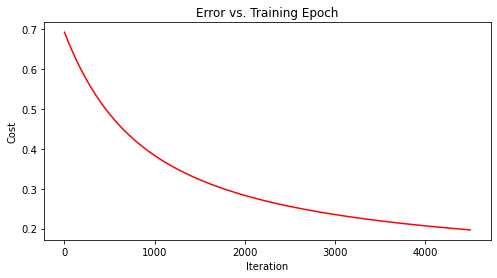

0.19656028879904547


In [14]:
#your code here------
fig2, ax = plt.subplots(figsize=(8, 4))
ax.plot(np.arange(epoch), cost, 'r') #arange() 主要是用于生成数组,括号内只有一个值代表终止值
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')#画出损失函数与迭代次数的图像
plt.show()
print(cost[-1])#此为最后一次loss值

<span style="color:purple">5)使用训练后的逻辑回归模型对测试数据集'flower_test.csv'进行预测，输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像)，要求如下:  
    1.将所得到的逻辑回归模型所得到的决策边界绘制出来  
  2.测试集的所有点在同一幅图中进行绘制  
  3.需要给不同类别的测试点不同颜色，方便通过颜色的区别直观看到预测正确和错误的样本</span>

In [15]:
positive = trainframe_1[trainframe_1.type.isin([1])]  # 1
negetive = trainframe_1[trainframe_1.type.isin([0])]  # 0


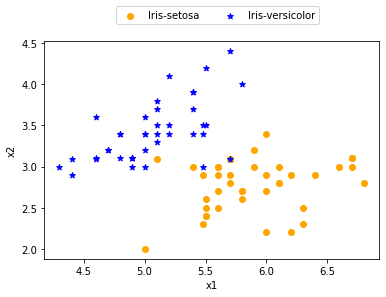

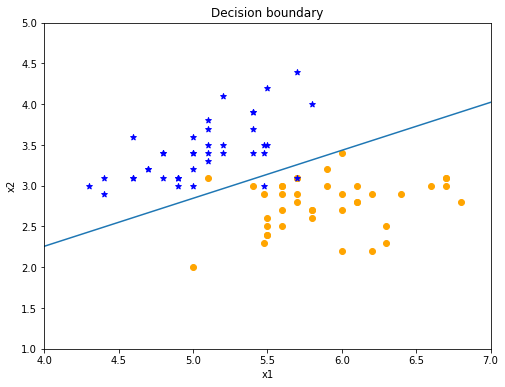

In [16]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(positive['x1'], positive['x2'], c='orange', label='Iris-setosa')
ax.scatter(negetive['x1'], negetive['x2'], c='b', marker='*', label='Iris-versicolor')
# 设置图例显示在图的上方
box = ax.get_position()
# 若是将图例画在坐标外边，如果放在右边，一般要给width*0.8左右的值，在上边，要给height*0.8左右的值
ax.set_position([box.x0, box.y0, box.width, box.height*0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12), ncol=2)
'''
(横向看右，纵向看下),如果要自定义图例位置或者将图例画在坐标外边，用它，
比如bbox_to_anchor=(1.4,0.8)，这个一般配合着ax.get_position()，set_position([box.x0, box.y0, box.width*0.8 , box.height])使用
用不到的参数可以直接去掉,有的参数没写进去，用得到的话加进去 , bbox_to_anchor=(1.11,0)
‘’’
'''
# 设置横纵坐标名
ax.set_xlabel('x1')
ax.set_ylabel('x2')
# 以下是根据数学关系式来决定的
x1 = np.arange(3.5, 7.5, step=0.1)
x2 = -(final_theta[0] + x1 * final_theta[1]) / final_theta[2]
fig2, ax = plt.subplots(figsize=(8, 6))
ax.scatter(positive['x1'], positive['x2'], c='orange', label='Iris-setosa')
ax.scatter(negetive['x1'], negetive['x2'], c='b', marker='*', label='Iris-versicolor')
ax.plot(x1, x2)
ax.set_xlim(4.0, 7.0)
ax.set_ylim(1, 5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision boundary')
plt.show()


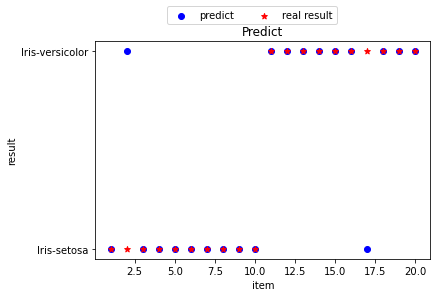

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
accuracy = 90.0 %


In [17]:
#预测结果 得到了0和1
result= predict(final_theta, testx)
#result 为0，1，而testy为type
for i in range(20):
    if result[i]==0:
        result[i]='Iris-setosa'
    else:
        result[i]='Iris-versicolor'

trainframe_1['type'] = np.where(trainframe_1['type'] == "Iris-setosa", 0, 1)
#如何判断预测正确，预测错误？
#print(result)
fig, ax = plt.subplots(figsize=(6, 5))
testy=np.array(testframe_1.iloc[ : , -1])
#print(testy)
x_column=np.arange(1,21, step=1)
ax.scatter(x_column, result, c='b', label='predict')
ax.scatter(x_column, testy, c='r',marker='*', label='real result')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height*0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12), ncol=2)
ax.set_xlabel('item')
ax.set_ylabel('result')
ax.set_title('Predict')
plt.show()
# 统计预测正确率
result=np.array(result)
correct = [1 if ((a == 'Iris-setosa'  and b == 'Iris-setosa') or (a == 'Iris-versicolor' and b == 'Iris-versicolor')) else 0 for (a, b) in zip(result, testy)]
print(correct)
accuracy = (sum(correct) / len(correct))*100
print ('accuracy =',accuracy, '%') 

**<font color = blue size=4>第三部分:逻辑回归实验二</font>**

<span style="color:purple">该数据集(train_titanic.csv和test_titanic.csv)同样为分类数据集，为泰坦尼克号的乘客信息以及最后是否生还。包括了七个特征值以及一个类别特征(即为Survived类型,代表是否生还),特征信息分别为Passengerid(乘客id)，Age(乘客年龄)，Fare(船票价格),Sex(性别)，sibsp(堂兄弟妹个数)，Parch(父母与小孩的个数)，Pclass(乘客等级)</span>

<span style="color:purple">该数据集已经做了处理，无缺失值和空值，且字符串类型全部转换成了整数类型，但是七个特征值与最后是否生还关联度不同。该实验的任务依然是在训练集上使用逻辑回归方法和手动实现的梯度下降方法完成模型训练。</span>

In [18]:
import pandas as pd
from sklearn.model_selection import KFold 
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import KFold  # 从sklearn导入KFold包
from sklearn.metrics import precision_recall_curve
#from sklearn.utils.fixes import signature
#read me: 后续若要修改特征，更换模型，只要改下fortest的数据及传入模型的参数即可


<span style="color:purple">1) 使用pandas库将训练数据集'train_titanic.csv'与测试数据集'test_titanic.csv'载入到Dataframe对象中</span>

In [19]:
#1， data prepare
train_frame=pd.read_csv('train_titanic.csv')
test_frame=pd.read_csv('test_titanic.csv')
train=np.array(train_frame)
test=np.array(test_frame)
print(train)

[[1.00000e+00 2.20000e+01 7.25000e+00 ... 0.00000e+00 3.00000e+00
  0.00000e+00]
 [2.00000e+00 3.80000e+01 7.12833e+01 ... 0.00000e+00 1.00000e+00
  1.00000e+00]
 [3.00000e+00 2.60000e+01 7.92500e+00 ... 0.00000e+00 3.00000e+00
  1.00000e+00]
 ...
 [1.30700e+03 3.85000e+01 7.25000e+00 ... 0.00000e+00 3.00000e+00
  0.00000e+00]
 [1.30800e+03 2.80000e+01 8.05000e+00 ... 0.00000e+00 3.00000e+00
  0.00000e+00]
 [1.30900e+03 2.80000e+01 2.23583e+01 ... 1.00000e+00 3.00000e+00
  0.00000e+00]]


<span style="color:purple">2) 选择至少4个特征值建立逻辑回归模型，利用梯度下降方法(由于该数据集样本数量较大，所以建议使用随机批量或小批量)进行模型训练，并使用10次10折交叉验证进行模型选择。</span>

In [20]:
#理论上组数为C74+C75+C76+C77的排列组合
#一组为Sex， age， Parch， fare
#另一组为Sex， id, Pclass, siblp, 
fold=10
model1=train_frame[['Sex', 'Age','Parch', 'Pclass','Survived']] #模型一
model2=train_frame[['Sex', 'Passengerid', 'Pclass', 'sibsp', 'Survived']]   #模型二
model3=train_frame[['Sex', 'Age', 'Pclass', 'Parch','Fare', 'Survived']]     #模型三
fortest=test_frame[['Sex', 'Age','Parch', 'Pclass','Survived']]         #用哪几个特证训练就用哪几个特征测试
model1=np.array(model1)
model2=np.array(model2)
model3=np.array(model3)
fortest=np.array(fortest)

In [21]:
#2， def fun
def gradientDescent2(X,y, theta, alpha, epoch):  #epoch为训练次数
    temp=np.array(np.zeros(theta.shape))#初始化一个临时矩阵
    cost=np.zeros(epoch)#初始化一个ndarray，包含每次训练后的cost
    #np.zeros 生成一个一维0矩阵
    counterTheta=np.zeros((epoch,theta.shape[0], 1)) #对应每次cost的theta
    m=len(X)#求行数
    for i in range(epoch):
        temp = theta-alpha*gradient(theta, X, y)
        theta=temp
        counterTheta[i]=theta
        cost[i]=computeCost(theta,X, y)#计算损失函数值
    pass #空语句，占位，避免报错
    return counterTheta, theta, cost
def StochastiGD(X, y, theta ,alpha, epoch):
    temp=np.matrix(np.zeros(theta.shape[0]))
    cost=np.zeros(epoch)
    counterTheta=np.zeros((epoch,2))
    m=X.shape[0]
    for i in range(epoch):
        for j in range(m):
            temp=theta-alpha*(X[j]*theta.T-y[j]).T*X[j]
            theta=temp
            #counterTheta[i]=theta
            cost[i]=computeCost(X,y, theta)#计算损失函数值
            pass
        pass
    return counterTheta, theta, cost

#输入数据推荐使用numpy数组，使用list格式输入会报错
def K_Flod_spilt(K,fold,data):
    '''
    :param K: 要把数据集分成的份数。如十次十折取K=10
    :param fold: 要取第几折的数据。如要取第5折则 flod=5
    :param data: 需要分块的数据
    :param label: 对应的需要分块标签
    :return: 对应折的训练集、测试集和对应的标签
    '''
    split_list = []
    kf = KFold(n_splits=K)
    for train, test in kf.split(data):
        split_list.append(train.tolist())
        split_list.append(test.tolist())
    train,test=split_list[2 * fold],split_list[2 * fold + 1]
    return  data[train], data[test]#已经分好块的数据集
def trainmodel(i, model, feature):               #训练模型，后续可以直接套, feature为特征数量
    train_i, test_i =K_Flod_spilt(10, i, model)
    #得到一折数据
    #取出前四列和后1列
    train_i=np.array(train_i)               #数据预处理！！！
    test_i=np.array(test_i)
    xi=train_i[ : , 0:feature]
    yi=train_i[ : , feature:feature+1]
    x_i=test_i[ : , 0:feature]
    y_i=test_i[ : , feature:feature+1]
    xi=np.c_[np.ones((xi.shape[0],1)),xi]       #注意要用shape[0]，记得加‘1’列
    x_i=np.c_[np.ones((x_i.shape[0],1)),x_i]
    #print(xi.shape)  #直接.shape
    #print(yi.shape)
    thetami=np.zeros((xi.shape[1],1))           #注意若有bug，试试二维！！！
    alpha=0.01
    epoch=3800
    counterThetai, thetai, costi=gradientDescent2(xi, yi, thetami ,alpha, epoch)
    #print(theta1, cost1)
    result1=predict(thetai, x_i)
    result1=np.array(result1)
    correct = [1 if ((a == 1  and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(result1, y_i)]
    #print(correct)
    accuracy = (sum(correct) / len(correct))*100
    print ('accuracy =',accuracy, '%')
    return accuracy


In [22]:
accm1=accm2=accm3=0           #accm1为第一个模型的正确率， accm2为第二个模型的正确率
for i in range(10):
    accm1+=(trainmodel(i, model1, 4)/100)
print('\n')
for i in range(10):
    accm2+=(trainmodel(i, model2, 4)/100)
print('\n')
for i in range(10):
    accm3+=(trainmodel(i, model3, 5)/100)
accm1/=10
accm2/=10
accm3/=10
print("model1 accuracy: ",accm1)
print("model2 accuracy: ",accm2)
print("model3 accuracy: ",accm3)

accuracy = 63.366336633663366 %
accuracy = 75.24752475247524 %
accuracy = 63.366336633663366 %
accuracy = 60.396039603960396 %
accuracy = 63.366336633663366 %
accuracy = 73.26732673267327 %
accuracy = 90.0990099009901 %
accuracy = 86.13861386138613 %
accuracy = 89.10891089108911 %
accuracy = 86.0 %


accuracy = 59.4059405940594 %
accuracy = 72.27722772277228 %
accuracy = 59.4059405940594 %
accuracy = 52.475247524752476 %
accuracy = 39.603960396039604 %
accuracy = 70.29702970297029 %
accuracy = 100.0 %
accuracy = 100.0 %
accuracy = 100.0 %
accuracy = 100.0 %


accuracy = 59.4059405940594 %
accuracy = 66.33663366336634 %
accuracy = 74.25742574257426 %
accuracy = 52.475247524752476 %
accuracy = 60.396039603960396 %
accuracy = 70.29702970297029 %
accuracy = 100.0 %
accuracy = 92.07920792079209 %
accuracy = 72.27722772277228 %
accuracy = 88.0 %
model1 accuracy:  0.7503564356435644
model2 accuracy:  0.7534653465346535
model3 accuracy:  0.7355247524752475


<span style="color:purple">3) 使用训练后的逻辑回归模型对测试数据集'test_titanic.csv'进行预测，并计算其精度，查准率，查全率，画出P-R曲线，画出ROC曲线。</span>

In [23]:
#经过十折交叉验证后发现第1组模型效果较好，选择第1组模型，并以数据集全部数据作为训练数据重新训练得到参数，再进行预测
#本代码优点在于：将模型封装为函数，后续只需将不同参数传入函数即可得到训练结果，便捷性与泛化性强！！
def traindata(model, feature):
    x1=model1[ : , 0:feature]
    y1=model1[ : , feature:feature+1]
    x1=np.c_[np.ones((x1.shape[0],1)),x1]       #注意要用shape[0]
    theta1=np.zeros((x1.shape[1],1))           #注意若有bug，试试二维！！！
    alpha=0.01
    epoch=3800
    counterTheta1, theta1, cost1=gradientDescent2(x1, y1, theta1 ,alpha, epoch)
    testx=fortest[ : , 0:feature]
    testx=np.c_[np.ones((testx.shape[0], 1)), testx]
    testy=fortest[ : , feature:feature+1]
    result1=predict(theta1, testx)
    result1=np.array(result1)
    correct = [1 if ((a == 1  and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(result1, testy)] #计算精度
    TP=[1 if(a==1 and b==1) else 0 for (a, b) in zip(result1, testy)]   #注意，此处还只是列表
    FP=[1 if(a==1 and b==0) else 0 for (a, b) in zip(result1, testy)]
    FN=[1 if(a==0 and b==1) else 0 for (a, b) in zip(result1, testy)]
    TPvalue=(sum(TP)/len(TP))       #转化为具体数值
    FPvalue=(sum(FP)/len(FP))
    FNvalue=(sum(FN)/len(FN))
    P=TPvalue/(TPvalue+FPvalue)
    R=TPvalue/(TPvalue+FNvalue)
    #print(correct)
    accuracy = (sum(correct) / len(correct))*100
    print ('accuracy =',accuracy, '%')
    print("P= ", P)
    print("R= ", R)
    return testx, testy, theta1,
testx, testy, theta1=traindata(model1, 4)

accuracy = 68.66666666666667 %
P=  0.9545454545454546
R=  0.1842105263157895


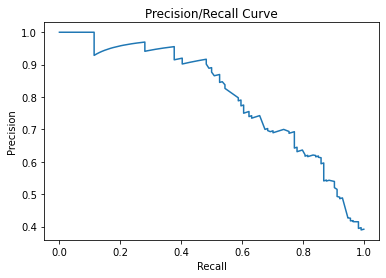

In [24]:
#画出P-R曲线， ROC曲线
#P-R曲线的生成方法：根据学习器的预测结果对样本进行排序,排在前面的是学习器认为最可能是正例的样本，排在最后的是最不可能是正例的样本
#这个依次将样本做为正例的过程实际上就是逐步降低样本为正例的概率的阈值，通过降低阈值，更多的样本会被预测为正例，从而会提高查全率，相对的查准率可能降低
plt.figure("P-R Curve")
plt.title('Precision/Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
#y_true为样本实际的类别，y_scores为样本为正例的概率
#将样本类别与概率捆版，然后对概率排序，每次增加一个正例，画出pr曲线
y_true=testy                                #样本实际类别即为testy
probability = sigmoid(testx @ theta1)       #计算每个样本的概率
precision, recall, thresholds = precision_recall_curve(y_true, probability)
#print(testy)
#print(probability)
plt.plot(recall,precision)
plt.show()


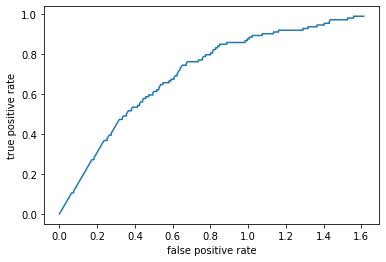

In [25]:
#ROC曲线
mtrue=len(testy[testy==1])  #实际结果为正例
mfalse=len(testy[testy==0]) #实际结果为负例
data=np.c_[testy, probability]
data=sorted(data, key=lambda x:x[1], reverse=True)      #对二维列表排序
#print(data)
x=[0]           #x坐标
y=[0]           #y坐标
ytrue=0         #标记为正例的数量
for i in range(1,len(testy)):
    if data[i][0]==1:
        ytrue+=1
        x.append(i/mfalse)
        y.append(ytrue/mtrue) 
    else:
        x.append((i+1)/mfalse)
        y.append(ytrue/mtrue)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(x, y)